In [1]:
pip install japanize-matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0654841f96f4d3a5d1b815256d64e5dfb8517b6f40802f9ac9b3453c2d832bb1
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

sample_df = pd.read_csv("sample_pandas_6.csv",)
sample_df


,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24
...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48


In [8]:
category_df = pd.read_csv("category.csv")
category_df


,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞
5,X0ZE2ZMY,飲料水
6,8T7D5DQA,菓子類
7,48XMJXKO,デザート
8,QRMOGNUU,雑貨
9,2HSTCDWM,デザート


In [9]:
df = pd.merge(sample_df, category_df[['商品番号','カテゴリー']], how='inner', on = '商品番号')
df

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,飲料水
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,弁当
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,弁当
...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,弁当
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,飲料水
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,デザート
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,雑貨


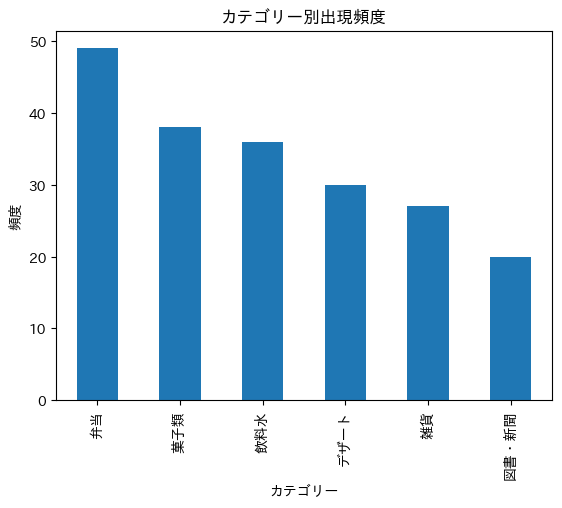

In [10]:
category_counts = df['カテゴリー'].value_counts()
category_counts.plot(kind='bar')
plt.xlabel('カテゴリー')  # 日本語でラベルを設定
plt.ylabel('頻度')         # 日本語でラベルを設定
plt.title('カテゴリー別出現頻度')  # 日本語でタイトルを設定
plt.show()

In [13]:
order_stats = df.groupby('商品番号')['注文数'].describe()
print(order_stats)

          count       mean        std  min   25%   50%   75%   max
商品番号                                                              
1QJFO8QY   32.0  35.250000  18.461818  0.0  24.0  36.0  49.5  60.0
2HSTCDWM   20.0  29.400000  21.137146  0.0  12.0  27.0  48.0  60.0
48XMJXKO   10.0  21.600000  13.326665  0.0  13.5  21.0  30.0  42.0
8T7D5DQA   21.0  25.142857  18.260027  0.0  12.0  36.0  42.0  54.0
MESUDVWQ   17.0  43.764706  18.219253  0.0  42.0  48.0  54.0  60.0
QRMOGNUU   27.0  33.111111  16.588535  6.0  21.0  36.0  48.0  60.0
S6RE8W6X   20.0  33.300000  21.631118  0.0  12.0  39.0  54.0  60.0
X0ZE2ZMY   14.0  21.857143  21.901377  0.0   1.5  15.0  39.0  60.0
YY4HAAZR   17.0  31.764706  18.095336  0.0  18.0  30.0  42.0  60.0
Z4WOOIYV   22.0  26.727273  19.218498  0.0  12.0  24.0  42.0  60.0
